# Analyzing Tourism in Tanzania

<a id='intro'></a>

### Background Study

Tourism plays a significant role in Tanzania's economy. The country has several tourist sights with about 38% of the land area set aside for conservation. It is the only country in the world that has allocated more than 25% of its total area for Wildlife, National Parks and Protected Areas. The country has 16 national parks,  44 game controlled areas, 28 game reserves, 2 marine parks and one conservation area. The highest mountain in Africa, Mount Kilimanjara is also found in Tanzania.

The tourism sector contributes approximately 17% of the country's GDP and 25% of all the foreign exchange revenues. This sector creates job oppurtunities for over 600,000 people directly and up to 2 million people indirectly. The revenue generated from Tourism has seen rapid increase over the years. The number of tourist arrivals has increased from about 500,000 in 2000 to over 1.1 million international visitors in 2014 mostly from Europe, US and Africa. Based on the govermnet's statistics, Tourism generated approximately 2.4 billion dollars in 2018.

<a id='objdata'></a>


### Objective

The objective of this competition is to explore and build a linear regression model that will predict the spending behaivior of tourists visiting Tanzania.The model can be used by different tour operators and the Tanzania Tourism Board to automatically help tourists across the world estimate their expenditure before visiting Tanzania. 

### Data

The dataset describes 6476 rows of up-to-date information on tourist expenditure collected by the National Bureau of Statistics (NBS) in Tanzania.The dataset was collected to gain a better understanding of the status of the tourism sector and provide an instrument that will enable sector growth.
The survey covers seven departure points, namely: Julius Nyerere International Airport, Kilimanjaro International Airport, Abeid Amani Karume International Airport, and the Namanga, Tunduma, Mtukula and Manyovu border points.


## Table of Contents
<ul>
<li><a href="#intro">Bacground Study</a></li>
<li><a href="#objdata">Objective and Data</a></li>    
<li><a href="#import">Importing the Necessary Libraries and Data</a></li>
<li><a href="#observe">Data Overview</a></li>
<li><a href="#explore">Exploratory Data Analysis</a></li>
<li><a href="#process">Data Preprocessing</a></li>
<li><a href="#model">Modelling and Model Evaluation</a></li>
<li><a href="#assume">Assumptions of Linear Model</a></li>
<li><a href="#conclude">Business Insights and Conclusions</a></li>

</ul>


<a id='import'></a>

### Importing Necessary Libraries and Data

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [159]:
df = pd.read_csv("Train .csv")
df_test = pd.read_csv("Test .csv")
definitions = pd.read_csv("VariableDefinitions.csv")

<a id='observe'></a>

### Data Overview

In [160]:
df.head(2)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5


In [161]:
df_test.head(2)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"


In [162]:
print (f"There are {df.shape[0]} rows and {df.shape[1]} columns in the train dataset")
print (f"There are {df_test.shape[0]} rows and {df_test.shape[1]} columns in the test dataset")
# As expected, the test dataset is short by one column : Total Cost (the dependent variable)

There are 4809 rows and 23 columns in the train dataset
There are 1601 rows and 22 columns in the test dataset


In [163]:
#Checking for duplicated Entries
print (f"There are {df.duplicated().sum()} duplicates in the train data and {df_test.duplicated().sum()} duplicates in the test data")

There are 0 duplicates in the train data and 0 duplicates in the test data


In [164]:
df.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [165]:
df_test.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing'],
      dtype='object')

In [166]:
df.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

In [167]:
df_test.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
payment_mode              object
first_trip_tz             object
most_impressing           object
dtype: object

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [169]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [170]:
definitions

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


<a id='explore'></a>

### Exploratory Data Analysis

Exploratory Data Analysis is conducted to better understand the data, generate insights as well as discover patters in the data. The following questions are explored:

**Questions**:

1. What are the top 5 countries with highest spending statistic?
2. Which age group has the highest spenders?
3. Who are the overall highest spenders by travel with?
4. What is the average number of nights a tourist spends in Tanzania Mainland?
5. What is the average number of nights a tourist spends in Tanzania Zanzibar?
6. What is the most preferred payment mode by tourists?
7. Which country has the most spending tourist?
8. Highlight the aspects of tourism that are more profitable and worthwhile to invest in?
9. What is the most sought after food by tourists?
10. What is the popular purpose for tourism and which has the highest average cost?
11. Do tourists who opt for the tourism packages spend more than those who don't and which package influences costs most?
12. Which tour arrangement do tourists typically spend more on?
13. On average, do tourists spend more on their first trip?

**What are the top 5 countries with highest spending statistic?**

The country that spends the most in its tour of Tanzania is Dominica, spending over 33.15 million Tanzanian shillings, followed by Costarica, Slovenia, Tunisia and Austrialia.

In [171]:
df.groupby('country')['total_cost'].mean().nlargest(5)

country
DOMINICA     3.315000e+07
COSTARICA    2.718300e+07
SLOVENIA     1.906237e+07
TUNISIA      1.574625e+07
AUSTRALIA    1.474802e+07
Name: total_cost, dtype: float64

**Which age group has the highest spenders?**

Based on the data provided from the National Bureau of Statistics in Tanzania, the elderly (65 years old and above) tend to spend more on tourism than their younger counterparts.

In [172]:
df.groupby("age_group")['total_cost'].mean().idxmax()

'65+'

**Who are the overall highest spenders by travel with?**

Tourists who travel alone generally spend less than those who travel with others. Also, families who travel together i.e. Spouses and Children spend more in their tour to Tanzania

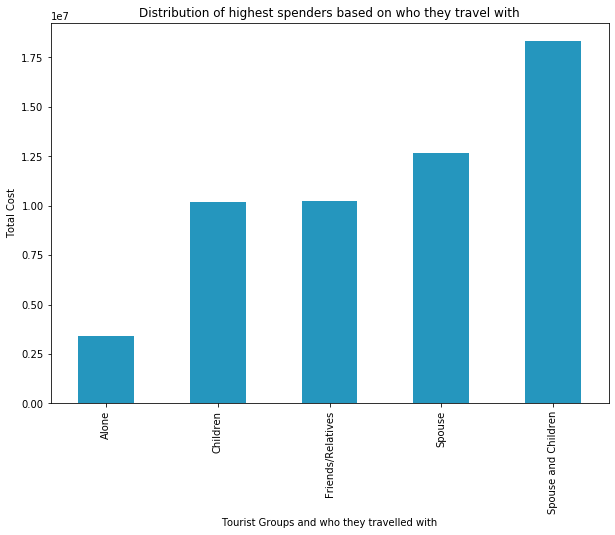

In [173]:
fig = plt.figure(figsize =(10, 7))
df.groupby("travel_with")['total_cost'].mean().plot.bar(color = '#2596be')
plt.xlabel("Tourist Groups and who they travelled with")
plt.ylabel("Total Cost")
plt.title("Distribution of highest spenders based on who they travel with")
plt.show()

In [174]:
#What is the average number of nights a tourist spends in Zanibar/Mainland?
zanzibar = df['night_zanzibar'].mean()
mainland = df['night_mainland'].mean()

print (f"The average number of nights spent by Tourists in Zanibar is {zanzibar:.2f} nights and {mainland:.2f} nights in mainland")

The average number of nights spent by Tourists in Zanibar is 2.30 nights and 8.49 nights in mainland


**What is the most preferred payment mode**

Based on the analysis, most tourists still prefer to pay in cash than through other means provided. The second popular option among tourists is using credit card. The Travellers Cheque option is almost completely ignored.

In [175]:
df['payment_mode'].value_counts([0])

Cash                 0.867540
Credit Card          0.129341
Other                0.001664
Travellers Cheque    0.001456
Name: payment_mode, dtype: float64

**Which country has the most spending tourist?**

Although Dominica has the average highest spending tourists, the tourist group that spent the most (as provided by this dataset) has residency in South Africa.

In [176]:
df[df['total_cost'] == df['total_cost'].max()]['country']

3411    SOUTH AFRICA
Name: country, dtype: object

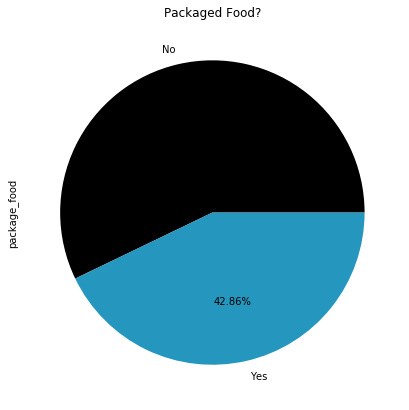

In [177]:
#Most sought after food by tourists
fig = plt.figure(figsize =(10, 7))
df['package_food'].value_counts().plot(kind = 'pie',autopct = "%.2f%%", colors = ['black','#2596be'])
plt.title("Packaged Food?")
plt.show()

#Most Tourists did not opt for the packaged food plan

**Highlight the aspects of tourism that are more profitable and worthwhile to invest in?**

The most profitable activity among the main tour activities is Driving and Sport Fishing, followed by Wildlife tourism and Conference Tourism.

In [178]:
df.groupby("main_activity")['total_cost'].mean().nlargest(10)

main_activity
Diving and Sport Fishing    1.709434e+07
Wildlife tourism            1.059533e+07
Conference tourism          1.030680e+07
business                    8.125078e+06
Beach tourism               7.524837e+06
Bird watching               4.216563e+06
Cultural tourism            3.991139e+06
Hunting tourism             1.911327e+06
Mountain climbing           1.862857e+06
Name: total_cost, dtype: float64

**Do tourists who opt for the tourism packages spend more than those who don't and which package influences costs most**

While more tourists subscribe for individual tour (about 53%) than the package tour. Those who use the package tour tend to spend more than their individual counterparts. Each package avaliable (food, accomodation, sightseeing etc.) and the average amount generated shows that for each package, the average spending rate for the tourists typically increases with insurance and international transport at the top of the list.

In [179]:
#Which tour arrangement do tourists typically spend more on?
df['tour_arrangement'].value_counts()

Independent     2570
Package Tour    2239
Name: tour_arrangement, dtype: int64

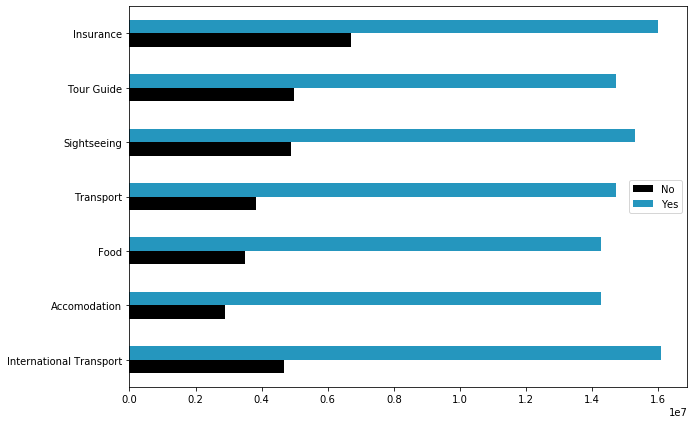

In [180]:
#Do tourists who opt for the tourism packages spend more than those who don't and which package influences costs most?
def tourism_packages (package):
    x = df.groupby([package])['total_cost'].mean()
    return x

new_df = pd.DataFrame()

columns = ['package_transport_int', 'package_accomodation','package_food','package_transport_tz','package_sightseeing',
          'package_guided_tour','package_insurance']

dictionary = {}
for i in columns:
    dictionary[i] = tourism_packages(i).to_dict()

packages = pd.DataFrame(dictionary)
packages.rename(columns = {'package_transport_int':'International Transport', 'package_accomodation':'Accomodation',
                          'package_food':'Food','package_transport_tz':'Transport', 'package_sightseeing':'Sightseeing',
                          'package_guided_tour':'Tour Guide','package_insurance':'Insurance'}, inplace = True)
packages = packages.T
packages.plot.barh(color = ['black','#2596be'], figsize = (10,7))
plt.show()

**On average, do tourists spend more on their first trip?**

Newcomer tourists (first-timers) tend to spend more than those who have toured in Tanzania before

In [181]:
df.groupby("first_trip_tz")['total_cost'].mean()

first_trip_tz
No     4.037669e+06
Yes    1.008298e+07
Name: total_cost, dtype: float64

**What is the popular purpose for tourism and which has the highest average cost?**

The most popular reason for tourism is for Leisure and Holidays. People who tour because of this reason also tend to spend more, on average, compared to those who tour for other reasons.

In [182]:
df['purpose'].value_counts()

Leisure and Holidays              2840
Business                           671
Visiting Friends and Relatives     633
Meetings and Conference            312
Volunteering                       138
Other                              128
Scientific and Academic             87
Name: purpose, dtype: int64

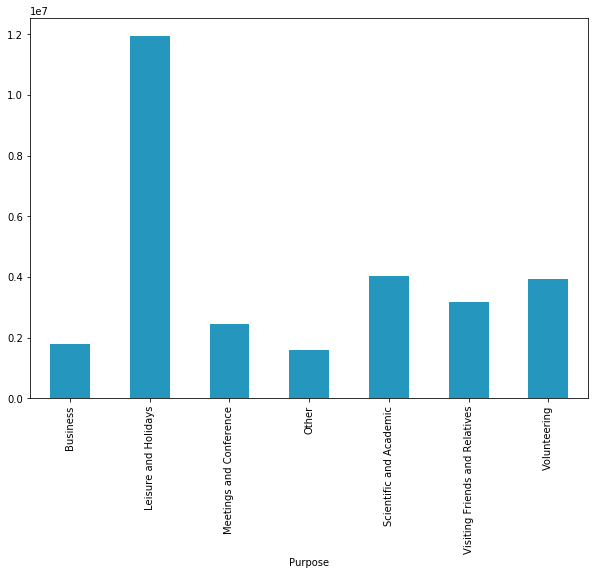

In [183]:
fig = plt.figure(figsize =(10, 7))
df.groupby("purpose")['total_cost'].mean().plot(kind='bar', color='#2596be')
plt.xlabel("Purpose");

<a id='process'></a>

## Data Preprocessing

#### Treating Missing Values

In [184]:
df.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [185]:
df_test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [186]:
def replace (df, col):
    '''
    This function is created to avoid code repitition. The purpose of this function is to replace the travel_with
    and most impressing columns with 'N/A' or Not Applicable indicating that the respondent tourist did not specify 
    an option in that case. This is preferred to dropping the column's rows to prevent information loss.
    
    '''
    replacement = 'N/A'
    df[col] = df[col].fillna(replacement)

replace(df, 'travel_with')
replace(df_test, 'travel_with')
replace(df, 'most_impressing')
replace(df_test, 'most_impressing')

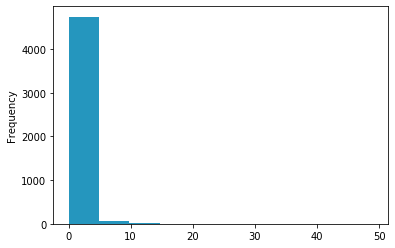

In [187]:
df['total_female'].plot(kind='hist', color='#2596be');

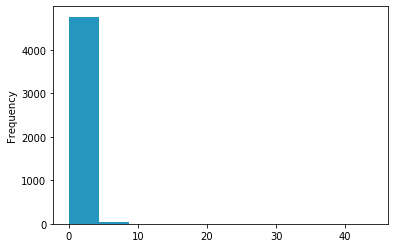

In [188]:
df['total_male'].plot(kind='hist',color='#2596be');

In [189]:
def fill_in(df, variable):
    
    '''
    This function is also created to prevent memory loss. In this case, the missing values are replaced with 
    their respective median. The median is used because based on the histograms above, the data contains extreme values.
    
    '''
    med = df[variable].median()
    df[variable] = df[variable].fillna(med)

fill_in(df, "total_male")
fill_in(df, "total_female")
fill_in(df_test, "total_male")
fill_in(df_test, "total_female")

In [190]:
print ("There are {} missing values in df".format(df.isnull().sum().sum()))
print ("There are {} missing values in df_test".format(df_test.isnull().sum().sum()))

There are 0 missing values in df
There are 0 missing values in df_test


,total_male,total_female,night_mainland,night_zanzibar,total_cost
total_male,1.000000,0.466985,-0.041957,0.050315,0.184657
total_female,0.466985,1.000000,0.031205,0.138541,0.286058
night_mainland,-0.041957,0.031205,1.000000,-0.118155,0.020473
night_zanzibar,0.050315,0.138541,-0.118155,1.000000,0.145139
total_cost,0.184657,0.286058,0.020473,0.145139,1.000000


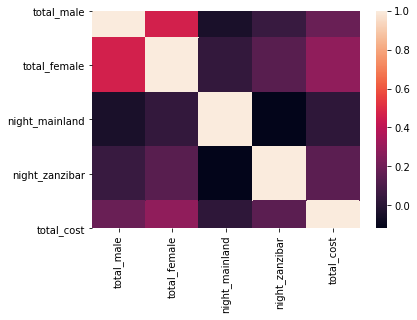

In [191]:
quantitative = df[['total_male','total_female','night_mainland','night_zanzibar','total_cost']]
display(quantitative.corr())
sns.heatmap(quantitative.corr())
#For the purpose of Feature of Extraction, we test the correlation between each independent variable and the 
#dependent variable, total cost

#### Data Types

In [192]:
df.dtypes

ID                        object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland           float64
night_zanzibar           float64
payment_mode              object
first_trip_tz             object
most_impressing           object
total_cost               float64
dtype: object

In [193]:
#The quantitative variables are supposed to be integers and not floats.

quantitative = ['total_male', 'total_female','night_mainland','night_zanzibar']

for i in quantitative:
    df[i] = df[i].astype("int")
    df_test[i] = df_test[i].astype("int")

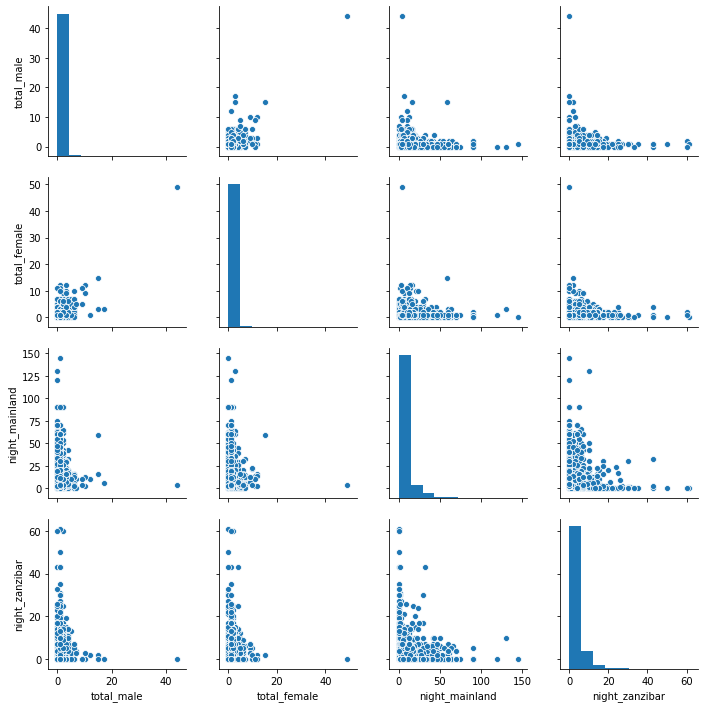

In [194]:
sns.pairplot(df[quantitative])

In [195]:
#For the purpose of modelling,the categorical data types are converted to integers.

categorical = ['age_group','purpose','main_activity','info_source','tour_arrangement','package_transport_int','package_accomodation',
              'package_food','package_transport_tz','package_sightseeing','package_guided_tour','package_insurance','payment_mode',
              'first_trip_tz','country','travel_with','most_impressing']

for i in categorical:
    df[i] = df[i].astype("category")
    df_test[i] = df_test[i].astype("category")

for i in categorical:
    df[i] = df[i].cat.codes
    df_test[i] = df_test[i].cat.codes

In [196]:
#Some of the categorical columns are transformed using Pandas' get dummies method to prevent the model attributing 
#more weight to some columns than the others.

dummies_cols = ['purpose','main_activity','info_source','tour_arrangement','payment_mode', 'travel_with','most_impressing']
df = pd.get_dummies(df,columns = dummies_cols,drop_first=True)
df_test = pd.get_dummies(df_test,columns = dummies_cols,drop_first=True)

In [197]:
df.dtypes

ID                        object
country                     int8
age_group                   int8
total_female               int32
total_male                 int32
package_transport_int       int8
package_accomodation        int8
package_food                int8
package_transport_tz        int8
package_sightseeing         int8
package_guided_tour         int8
package_insurance           int8
night_mainland             int32
night_zanzibar             int32
first_trip_tz               int8
total_cost               float64
purpose_1                  uint8
purpose_2                  uint8
purpose_3                  uint8
purpose_4                  uint8
purpose_5                  uint8
purpose_6                  uint8
main_activity_1            uint8
main_activity_2            uint8
main_activity_3            uint8
main_activity_4            uint8
main_activity_5            uint8
main_activity_6            uint8
main_activity_7            uint8
main_activity_8            uint8
info_sourc

In [198]:
df.head()

,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,...,travel_with_3,travel_with_4,travel_with_5,most_impressing_1,most_impressing_2,most_impressing_3,most_impressing_4,most_impressing_5,most_impressing_6,most_impressing_7
0,tour_0,89,2,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,tour_10,99,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,tour_1000,99,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,tour_1002,99,1,1,1,0,1,1,1,1,...,0,1,0,0,1,0,0,0,0,0
4,tour_1004,13,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [199]:
df.dtypes

ID                        object
country                     int8
age_group                   int8
total_female               int32
total_male                 int32
package_transport_int       int8
package_accomodation        int8
package_food                int8
package_transport_tz        int8
package_sightseeing         int8
package_guided_tour         int8
package_insurance           int8
night_mainland             int32
night_zanzibar             int32
first_trip_tz               int8
total_cost               float64
purpose_1                  uint8
purpose_2                  uint8
purpose_3                  uint8
purpose_4                  uint8
purpose_5                  uint8
purpose_6                  uint8
main_activity_1            uint8
main_activity_2            uint8
main_activity_3            uint8
main_activity_4            uint8
main_activity_5            uint8
main_activity_6            uint8
main_activity_7            uint8
main_activity_8            uint8
info_sourc

#### Feature Engineering

Two additional columns: Total Number of People and Total Number of Nights were created from the Total Female & Total Male, Night Zanzibar & Night Mainland columns respectively.

In [200]:
df['total_people'] = df['total_female'] + df['total_male']
df['total_nights'] = df['night_zanzibar'] + df['night_mainland']

df_test['total_people'] = df_test['total_female'] + df_test['total_male']
df_test['total_nights'] = df_test['night_zanzibar'] + df_test['night_mainland']

In [201]:
X = df.drop(['total_cost','ID'],1)
y = df['total_cost']

#### Splitting Data and Scaling

The data is split into a 75%:25% split for the purpose of model evaluation. Also, the data is scaled using the Robust Scaler because this scaler takes into consideration possible outliers present in the data.

In [202]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25, random_state=42)

In [203]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='model'></a>

### Modelling and Evaluation

In [204]:
import statsmodels.api as sm
mod = sm.OLS(y_train,X_train)
res = mod.fit()
print (res.summary())

                            OLS Regression Results                            
Dep. Variable:             total_cost   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     38.24
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          3.54e-294
Time:                        20:12:01   Log-Likelihood:                -63192.
No. Observations:                3606   AIC:                         1.265e+05
Df Residuals:                    3554   BIC:                         1.268e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.488e+05   3.24e+05      1.692      0.0

In [205]:
pred = res.predict(X_test)
mae = sm.tools.eval_measures.meanabs(y_test,pred)
rmse = sm.tools.eval_measures.rmse(y_test,pred)

print (f"The Mean Absolute Error is {mae:.0f}")
print (f"The Root Mean Squared Error is {rmse:.0f}")

The Mean Absolute Error is 5627882
The Root Mean Squared Error is 9640520


In [206]:
predTest = res.predict(df_test.drop(['ID'],1))
new = pd.DataFrame(df_test['ID'], columns = ['ID'])
new['predictions'] = predTest
new
#Predicting using the Model above on the test data

,ID,predictions
0,tour_1,1.897356e+07
1,tour_100,5.169749e+07
2,tour_1001,5.646041e+06
3,tour_1006,6.359515e+06
4,tour_1009,6.639231e+07
...,...,...
1596,tour_988,4.608246e+07
1597,tour_990,3.525831e+07
1598,tour_992,1.608019e+07
1599,tour_996,3.961256e+07


<a id='assume'></a>

### Assumptions of Linear Regression

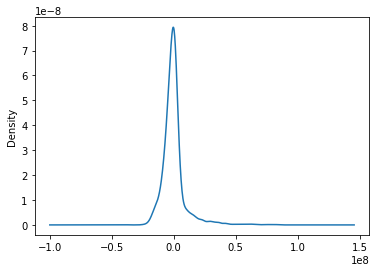

In [207]:
#KDE Plot -- Tbe KDE is slightly right-skewed.
res.resid.plot.kde();

#The KDE is rightly skewed.

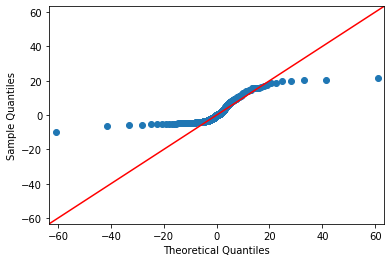

In [208]:
sm.qqplot(res.resid, stats.t,fit=True,line='45');

<a id='conclude'></a>

### Conclusions and Recommendations

After a general analysis of the data, the following were discovered about the spending habits of the tourists:

+ Tourists who are older (65+) spend more than those who are younger
+ Dominicia is the country with the highest average amount spent on Tourism in tanzania
+ Most people tour for Leisure and Holidays as opposed to other purposes such as Business and Academia. People who tour for Leisure/Holidays also spend more than other tourists. 
+ First timer tourists spend more than those who have toured tanzania before
+ More people prefer the Indiividual option to the package option, but those who use the package option typically spend more than others who do not. 
+ Most tourists prefer to pay in cash than the other provided payment methods.

Business Experts can leverage on the provided information in this analysis to aid customer satisfaction and generally increase the revenue generated from Tourism in Tanzania. 

#### Modelling and Evaluation

The linear mode (Linear Regression Model) is used in this analysis for prediction. For evaluation, the two most popular means of model evaluation for a regression model, Mean Absolute Error and Root Mean Squared Error, are used and it is found to be 5627882 and 9640520 respectively. Upon testing the data if it is follows the Linear Model assumption, the KDE and QQPlots are used and it is found that the data is not entirely linear.
Since most variables in the data are categorical and the data doesn't entirely follow the linear trend, categorical models such as CatBoost could be applied as a means to strengthen model ability. 
Also, this model could be deployed as a Web Application to better avaliability and to aid user-experience. 
